## 손글씨 숫자 식별 모델
---
 - 데 이 터: MNIST 데이터 사용
 - 학습모델: 신경망모델
 - 동작: 0~9사이 숫자 판별

In [37]:
# 모듈 로딩
from keras import Sequential              # 모델 객체 
from keras.layers import Dense            # 레이어 객체
from keras.layers import Dropout            # 레이어 객체
from keras.layers import Flatten


import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data

In [38]:
# 모델 도식화: 추가 패키지 설치 필요
from keras.utils import plot_model

# 추가 패키지: pydotplus pydot 
# 윈도우: graphviz

### [1] 데이터 로딩

In [39]:
# 학습용 : 테스트용 = 8 : 2
(x_train, y_train), (x_test, y_test) = load_data()

In [40]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [41]:
# 검증용 데이터셋 준비
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train) # y_train 비율에 맞게

In [42]:
x_train.shape, x_val.shape

((45000, 28, 28), (15000, 28, 28))

### [2] 데이터 전처리
---
 - 수치 데이터 -> 스케일링
 - 범주형 데이터 -> 원핫인코딩

In [43]:
# 값 확인
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 133, 230,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 132, 252,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [44]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
# 각 픽셀은 0~255사이의 숫자(8비트 표현)
# 소수점 반올림 방지위해 실수로 나눗셈
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [45]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
# 타겟 라벨 -> 원핫인코딩으로 변환
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder=OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train=encoder.transform(y_train.reshape(-1,1))

In [12]:
# type 넘파이로 변환
# type(y_train)

y_train=y_train.toarray()

In [13]:
type(y_train)

numpy.ndarray

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
# test, val
encoder.fit(y_test.reshape(-1,1))
y_test=encoder.transform(y_test.reshape(-1,1))
y_test=y_test.toarray()
encoder.fit(y_val.reshape(-1,1))
y_val=encoder.transform(y_val.reshape(-1,1))
y_val=y_val.toarray()

### [3] 모델 생성
---
 - (1) 모델 구성
 - (2) 모델 생성

#### [3-1] 모델 구성
---
 - 입력 데이터: 784 -> 28*28 이미지 데이터 
 - 출력 데이터: 10 -> 0~9 숫자 라벨(확률)
 - 학습 방  법: 분류 - 다중분류

In [16]:
# NN Model의 Layer를 층층이 담아서 관리하는 객체
model=Sequential(name='MNIST_NNModel')

In [17]:
# 입력 Layer 생성(첫 레이어) -> Node(퍼셉트론, 뉴런) 갯수, 활성화 함수 [옵션]input_shape param(따로 가능)
model.add(Dense(250, activation='relu', input_shape=(784,)))

# Flatten
# 몇 차원을 주던 1차원으로 펼쳐줌

# model.add(Flatten(input_shape=(784,))) # 첫번째레이어

In [18]:
# 과적합 해소
model.add(Dropout(0.3))

In [19]:
model.add(Dense(100, activation='relu'))

In [20]:
# 과적합 해소
model.add(Dropout(0.3))

In [21]:
# 출력 Layer 생성 -> Node(퍼셉트론, 뉴런) 갯수, 활성화 함수
model.add(Dense(10, activation='softmax'))

In [22]:
# 모델 구성 확인 -> summary()
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


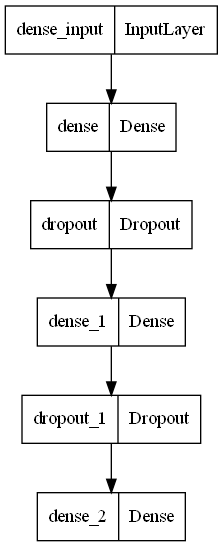

In [24]:
# 모델 도식화
plot_model(model)

#### [3-2] 모델 생성
---
 - loss 함수
   - 이진분류: binary_crossentropy
   - 다중분류: categorical_crossentropy, sparse_categorical_crossentropy
 - optimizer(최적화) 기법 -> 'rmsprop' 기본
 - matrics 평가항목 -> 'loss'기본

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

### [4] 학습

In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 검증 데이터에 대한 loss값 3번 연속 개선되지 않으면 학습 중지
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [27]:
MODEL_PATH='./modelFiles'

# MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.hdf5' # 각 파일?폴더?


modelCB=ModelCheckpoint(filepath=MODEL_PATH, save_best_only=True)
# save_weights_only=True # 가중치만 저장
# save_best_only=True # 최고점수만 저장

In [28]:
# reshape
x_train=x_train.reshape(-1,784)

In [29]:
x_val=x_val.reshape(-1, 784)
x_test=x_test.reshape(-1, 784)

In [30]:
his=model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), callbacks=[stopCB, modelCB])

Epoch 1/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3504 - accuracy: 0.8943 - val_loss: 0.1362 - val_accuracy: 0.9601
Epoch 2/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.1700 - accuracy: 0.9493 - val_loss: 0.1046 - val_accuracy: 0.9683
Epoch 3/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1340 - accuracy: 0.9595 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 4/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1099 - accuracy: 0.9663 - val_loss: 0.0875 - val_accuracy: 0.9754
Epoch 5/10
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0972 - accuracy: 0.9700 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 6/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.0716 - val_accuracy: 0.9789
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 0.0774 - val_accuracy

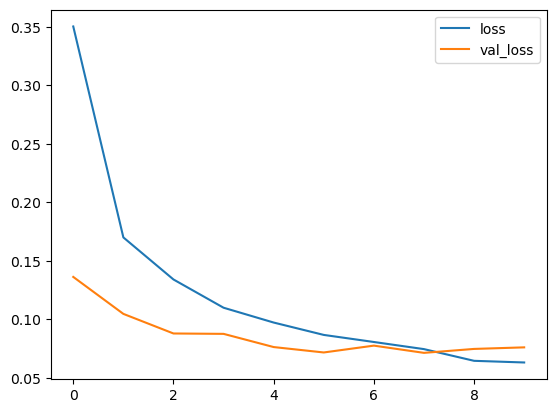

In [31]:
# 학습 진행 결과 시각화

# 메모리 에러남
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 시각화
import matplotlib.pyplot as plt
plt.plot(his.epoch, his.history['loss'], label='loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

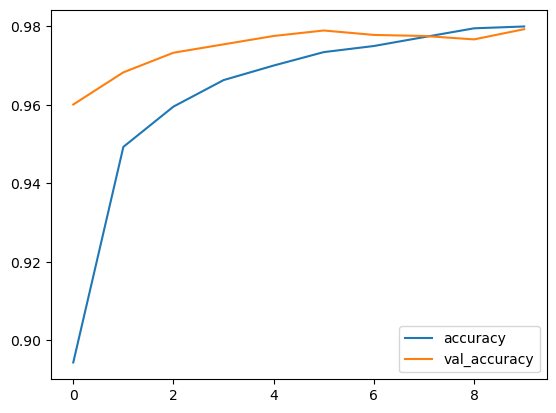

In [32]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(his.epoch, his.history['accuracy'], label='accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [33]:
# (최종)모델 저장하기
# model.save()

# 가중치만 저장
# model.save_weights()

### [5] 평가
---
 - evaluate() 메서드
   - 파라미터: test_data, test_target
   - 반환값: loss, compile()의 matrics에서 설정한 항목값

In [34]:
test_result=model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.9791


### [6] 테스트/예측
---
 - predict()

In [35]:
pre_label=model.predict(x_test[:1])
np.round(pre_label, 2)

1/1 [==============================] - 0s 182ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [36]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])